# Create a simple ISA descriptor

This example details:
- How to create metadata for a single study ISA descriptor
- How to write the ISA in-memory Model content to file in ISA-Tab format.
- How to write the ISA in-memory Model to file in ISA-JSON format.
- How to load an ISA object representation from an ISA-JSON document on disk.

## ISA Study metadata

In [1]:
from isatools.model import *
from isatools import isatab
from isatools import isajson
import io
# from isatools.isajson import ISAJSONEncoder
# from isatools.isajson import load
# from isatools.isatab import dumps

from ipywidgets import RadioButtons, VBox, HBox, Layout, Label, Text, Textarea, DatePicker

import json
import datetime
import os

# identifier = Text(
#         value="1",
#         placeholder='e.g. 1',
#         description='Identifier:',
#         disabled=False
#     )
# title = Text(
#         value='My Simple ISA Study',
#         placeholder='e.g. My Study title',
#         description='Title:',
#         disabled=False
#     )
# description = Textarea(
#     value="We could alternatively use the class constructor's parameters to set some default " \
#           "values at the time of creation, however we want to demonstrate how to use the " \
#           "object's instance variables to set values.",
#     placeholder='Type something',
#     description='Description:',
#     disabled=False
# )
# sub_date = DatePicker(description="Submission date:", value=datetime.datetime.today())
# release_date = DatePicker(description="Public release date:", value=datetime.datetime.today())
# VBox([identifier,
#       title,
#       description,
#       sub_date,
#       release_date])

### 1. Declaring terminology resources 

In [2]:
investigation = Investigation(identifier="1")
investigation.title="some title"
investigation.description="some description"
obi = OntologySource(name='OBI', description="Ontology for Biomedical Investigation")
ncbitaxon = OntologySource(name='NCBITaxon', description="NCBI Taxonomy")
# 2. Adding them to the Investigation object
investigation.ontology_source_references.append(obi)
investigation.ontology_source_references.append(ncbitaxon)

# print(investigation)


### 2. Creating an example of ISA Study descriptor:

In [3]:
study_design_annotation = OntologyAnnotation(term_source=obi)
study_design_annotation.term = "intervention design"
study_design_annotation.term_accession = "http://purl.obolibrary.org/obo/OBI_0000115"

### 3. Populating some of the ISA Study attribute from the form:

In [4]:
study = Study(filename="s_study.txt")
study.identifier = "test"
study.title = "test"
study.description = "some description"
study.submission_date = "2019/12/20"
study.public_release_date = "2019/12/20"
study.design_descriptors.append(study_design_annotation)

### 4. Adding an ISA Study to an ISA Investigation object

### 5. Creation of an ISA Study Factor object

In [5]:
f=StudyFactor(name="treatment['modality']", factor_type=OntologyAnnotation(term="treatment['modality']"))
# checking that the ISA Factor object has been modified
study.factors.append(f)

#testing serialization to ISA-TAB of Comments attached to ISA objects.
# f.comments.append(Comment(name="Study Start Date",value="Moon"))
# print(f.comments[0].name, "|", f.comments[0].value)

### 6. Creation of an ISA Person object and adding it to the list of ISA Study Contacts:

In [6]:
contact = Person(first_name="Alice", last_name="Robertson", affiliation="University of Life", roles=[OntologyAnnotation(term='submitter')])
study.contacts.append(contact)

### 7. Creation of an ISA Publication object and adding it to the list of ISA Study Publications.

In [7]:
publication = Publication(title="Experiments with Humans", author_list="A. Robertson, B. Robertson")
publication.pubmed_id = "12345678"
publication.status = OntologyAnnotation(term="published")
study.publications.append(publication)

print(study)

Study(
    identifier=test
    filename=s_study.txt
    title=test
    description=some description
    submission_date=2019/12/20
    public_release_date=2019/12/20
    contacts=1 Person objects
    design_descriptors=1 OntologyAnnotation objects
    publications=1 Publication objects
    factors=1 StudyFactor objects
    protocols=0 Protocol objects
    assays=0 Assay objects
    sources=0 Source objects
    samples=0 Sample objects
    process_sequence=0 Process objects
    other_material=0 Material objects
    characteristic_categories=0 OntologyAnnots
    comments=0 Comment objects
    units=0 Unit objects
)


### 8. Creating a parent ISA Source:

In [8]:
source_A = Source(name='source_material_A')
#Specifying the taxonomic group of the ISA Source 
characteristic_organism = Characteristic( category=OntologyAnnotation(id_='1',
                                                                      term="Organism"),
                                                                      value=OntologyAnnotation(
                                                                             term="Homo Sapiens",
                                                                             term_source=ncbitaxon,
                                                                             term_accession="http://purl.bioontology.org/ontology/NCBITAXON/9606"))
# Adding the description to the ISA Source Material:
source_A.characteristics.append(characteristic_organism)

study.sources.append(source_A)

In [9]:
source_B = Source(name='source_material_B')
#Specifying the taxonomic group of the ISA Source 
characteristic_organism = Characteristic( category=OntologyAnnotation(id_='1',
                                                                      term="Organism"),
                                                                      value=OntologyAnnotation(
                                                                             term="Mus musculus",
                                                                             term_source=ncbitaxon,
                                                                             term_accession="http://purl.bioontology.org/ontology/NCBITAXON/10090"))
# Adding the description to the ISA Source Material:
source_B.characteristics.append(characteristic_organism)

study.sources.append(source_B)

In [10]:
# Creating a template for ISA Sample Material deriving from the ISA Source Material we create before:
prototype_sample_df_A = Sample(name='sample_material-A', derives_from=[source_A])

# To annotate this sample, we need terms from a new ontology, here UBERON, let's declare it.
uberon = OntologySource(name='UBERON', description="UBER Anatomy Ontology")
# Important!: be sure to add all ontology resources, failing to do so will raise error when invoking a non-referenced resources
investigation.ontology_source_references.append(uberon)

# Creating an ```ISA characteristic``` attribute to annotation the ```ISA Sample``` to indicate the nature of the specimen
characteristic_organ_a = Characteristic(category=OntologyAnnotation(id_='2',
                                                                  term="OrganismPart"),
                                      value=OntologyAnnotation(term="liver",
                                                              term_source=uberon,
                                                              term_accession="http://purl.obolibrary.org/obo/UBERON_0002107"))

# Associating the instances of 
prototype_sample_df_A.characteristics.append(characteristic_organ_a)

study.samples=batch_create_materials(prototype_sample_df_A, n=1)
print(study.samples)

[isatools.model.Sample(name='sample_material-A-0', characteristics=[isatools.model.Characteristic(category=isatools.model.OntologyAnnotation(term='OrganismPart', term_source=None, term_accession='', comments=[]), value=isatools.model.OntologyAnnotation(term='liver', term_source=isatools.model.OntologySource(name='UBERON', file='', version='', description='UBER Anatomy Ontology', comments=[]), term_accession='http://purl.obolibrary.org/obo/UBERON_0002107', comments=[]), unit=None, comments=[])], factor_values=[], derives_from=[isatools.model.Source(name='source_material_A', characteristics=[isatools.model.Characteristic(category=isatools.model.OntologyAnnotation(term='Organism', term_source=None, term_accession='', comments=[]), value=isatools.model.OntologyAnnotation(term='Homo Sapiens', term_source=isatools.model.OntologySource(name='NCBITaxon', file='', version='', description='NCBI Taxonomy', comments=[]), term_accession='http://purl.bioontology.org/ontology/NCBITAXON/9606', comment

In [11]:
# Creating a template for ISA Sample Material deriving from the ISA Source Material we create before:
prototype_sample_df_B = Sample(name='sample_material-B', derives_from=[source_B])

# Creating an ```ISA characteristic``` attribute to annotation the ```ISA Sample``` to indicate the nature of the specimen
characteristic_organ_b = Characteristic(category=OntologyAnnotation(id_='3',
                                                                  term="OrganismPart"),
                                      value=OntologyAnnotation(term="heart",
                                                              term_source=uberon,
                                                              term_accession="http://purl.obolibrary.org/obo/UBERON_0000948"))

# Associating the instances of 
prototype_sample_df_B.characteristics.append(characteristic_organ_b)

Bsamples=batch_create_materials(prototype_sample_df_B, n=1)

study.samples.extend(Bsamples)
print(study.samples)

[isatools.model.Sample(name='sample_material-A-0', characteristics=[isatools.model.Characteristic(category=isatools.model.OntologyAnnotation(term='OrganismPart', term_source=None, term_accession='', comments=[]), value=isatools.model.OntologyAnnotation(term='liver', term_source=isatools.model.OntologySource(name='UBERON', file='', version='', description='UBER Anatomy Ontology', comments=[]), term_accession='http://purl.obolibrary.org/obo/UBERON_0002107', comments=[]), unit=None, comments=[])], factor_values=[], derives_from=[isatools.model.Source(name='source_material_A', characteristics=[isatools.model.Characteristic(category=isatools.model.OntologyAnnotation(term='Organism', term_source=None, term_accession='', comments=[]), value=isatools.model.OntologyAnnotation(term='Homo Sapiens', term_source=isatools.model.OntologySource(name='NCBITaxon', file='', version='', description='NCBI Taxonomy', comments=[]), term_accession='http://purl.bioontology.org/ontology/NCBITAXON/9606', comment

In [12]:
sample_collection_protocol = Protocol(name="sample collection",
                                      protocol_type=OntologyAnnotation(term="sample collection"))

study.protocols.append(sample_collection_protocol)

sample_collection_process = Process(executes_protocol=sample_collection_protocol)

for src in study.sources:
    print("sources: ",src)
    sample_collection_process.inputs.append(src)
for sam in study.samples:
    print("samples: ", sam)
    sample_collection_process.outputs.append(sam)

study.process_sequence.append(sample_collection_process)

# print(study.samples)

sources:  Source(
    name=source_material_A
    characteristics=1 Characteristic objects
    comments=0 Comment objects
)
sources:  Source(
    name=source_material_B
    characteristics=1 Characteristic objects
    comments=0 Comment objects
)
samples:  Sample(
    name=sample_material-A-0
    characteristics=1 Characteristic objects
    factor_values=0 FactorValue objects
    derives_from=1 Source objects
    comments=0 Comment objects
)
samples:  Sample(
    name=sample_material-B-0
    characteristics=1 Characteristic objects
    factor_values=0 FactorValue objects
    derives_from=1 Source objects
    comments=0 Comment objects
)


### Important: 
when creating the ISA descriptor objects manually, all the ISA Material Characteristics Category (the main type of annotations) need to be listed and attached to the ISA Study object, as shown below:

In [13]:
study.characteristic_categories.append(characteristic_organ_a.category)
study.characteristic_categories.append(characteristic_organ_b.category)
study.characteristic_categories.append(characteristic_organism.category)


### Creating ISA assay with 2 chained protocols:

In [14]:
# assay = Assay(filename="a_assay_2protocols.txt")

# extraction_protocol = Protocol(name='extraction', protocol_type=OntologyAnnotation(term="material extraction"))
# study.protocols.append(extraction_protocol)

# sequencing_protocol = Protocol(name='sequencing', protocol_type=OntologyAnnotation(term="material sequencing"))
# study.protocols.append(sequencing_protocol)
    
# for i, sample in enumerate(study.samples):
    
#     # create an extraction process that executes the extraction protocol
#     extraction_process = Process(executes_protocol=extraction_protocol)
    
#     # extraction process takes as input a sample, and produces an extract material as output
#     extraction_process.inputs.append(sample)
#     material = Material(name="extract-{}".format(i))
#     material.type = "Extract Name"
#     extraction_process.outputs.append(material)

#     # create a sequencing process that executes the sequencing protocol
#     sequencing_process = Process(executes_protocol=sequencing_protocol)
#     sequencing_process.name = "assay-name-{}".format(i)
#     sequencing_process.inputs.append(extraction_process.outputs[0])

#     # Sequencing process usually has an output data file
#     datafile = DataFile(filename="sequenced-data-{}".format(i), label="Raw Data File", generated_from=[sample])
#     sequencing_process.outputs.append(datafile)

#     # Ensure Processes are linked forward and backward. plink(from_process, to_process) is a function to set
#     # these links for you. It is found in the isatools.model package
#     plink(extraction_process, sequencing_process)

#     # make sure the extract, data file, and the processes are attached to the assay
#     assay.samples.append(sample)
#     assay.data_files.append(datafile)
#     assay.other_material.append(material)
#     assay.process_sequence.append(extraction_process)
#     assay.process_sequence.append(sequencing_process)

# assay.measurement_type = OntologyAnnotation(term="gene sequencing")
# assay.technology_type = OntologyAnnotation(term="nucleotide sequencing") 
    
# study.assays.append(assay)

### Creating ISA assay with 3 chained protocols:

In [15]:
assay_3steps = Assay(filename="a_assay_3protocols.txt")

extraction_protocol = Protocol(name='extraction', protocol_type=OntologyAnnotation(term="material extraction"))
study.protocols.append(extraction_protocol)

library_prep_protocol = Protocol(name='library construction', protocol_type=OntologyAnnotation(term="library construction"))
study.protocols.append(library_prep_protocol)

sequencing_protocol = Protocol(name='sequencing', protocol_type=OntologyAnnotation(term="material sequencing"))
study.protocols.append(sequencing_protocol)
    
for i, sample in enumerate(study.samples):
    
    # create an extraction process that executes the extraction protocol
    extraction_process = Process(executes_protocol=extraction_protocol, name='Extraction_{}'.format(i))
    
    # extraction process takes as input a sample, and produces an extract material as output
    extraction_process.inputs.append(sample)
    material = Material(name="extract-{}".format(i))
    material.type = "Extract Name"
   # extraction_process.outputs.append(material)
    
    # library preparation process
    library_process = Process(executes_protocol=library_prep_protocol, name='Library_{}'.format(i))
#     library_process.inputs.append(material)
    # HERE no input is declared explicitly

    # create a sequencing process that executes the sequencing protocol
    sequencing_process = Process(executes_protocol=sequencing_protocol, name='Sequencing_{}'.format(i))
#    sequencing_process.name = "assay-name-{}".format(i)
#     sequencing_process.inputs.append(extraction_process.outputs[0])

    # Sequencing process usually has an output data file
    datafile = DataFile(filename="sequenced-data-{}".format(i), label="Raw Data File", generated_from=[sample])
    sequencing_process.outputs.append(datafile)

    # Ensure Processes are linked forward and backward. plink(from_process, to_process) is a function to set
    # these links for you. It is found in the isatools.model package
    plink(extraction_process, library_process)
    plink(library_process, sequencing_process)

    # make sure the extract, data file, and the processes are attached to the assay
    assay_3steps.samples.append(sample)
    assay_3steps.data_files.append(datafile)
    #assay_3steps.other_material.append(material)
    assay_3steps.process_sequence.append(extraction_process)
    assay_3steps.process_sequence.append(library_process)
    assay_3steps.process_sequence.append(sequencing_process)

assay_3steps.measurement_type = OntologyAnnotation(term="transcriptome profiling")
assay_3steps.technology_type = OntologyAnnotation(term="nucleotide sequencing") 
    
study.assays.append(assay_3steps)

In [16]:
investigation.studies = [study]
print(study)

# study.comments.append(Comment(name="Study Start Date",value="Sun"))
# adding a dummy Comment[] to ISA.protocol object
# study.protocols[0].comments.append(Comment(name="Study Start Date",value="Uranus"))
# checking that the ISA Protocool object has been modified
# print(study.protocols[0])

Study(
    identifier=test
    filename=s_study.txt
    title=test
    description=some description
    submission_date=2019/12/20
    public_release_date=2019/12/20
    contacts=1 Person objects
    design_descriptors=1 OntologyAnnotation objects
    publications=1 Publication objects
    factors=1 StudyFactor objects
    protocols=4 Protocol objects
    assays=1 Assay objects
    sources=2 Source objects
    samples=2 Sample objects
    process_sequence=1 Process objects
    other_material=0 Material objects
    characteristic_categories=3 OntologyAnnots
    comments=0 Comment objects
    units=0 Unit objects
)


### Serialization as ISA-Tab

In [17]:
print(isatab.dumps(investigation))

2019-12-05 16:10:26,685 [INFO]: model.py(graph:1543) >> Building graph for object: Study(
    identifier=test
    filename=s_study.txt
    title=test
    description=some description
    submission_date=2019/12/20
    public_release_date=2019/12/20
    contacts=1 Person objects
    design_descriptors=1 OntologyAnnotation objects
    publications=1 Publication objects
    factors=1 StudyFactor objects
    protocols=4 Protocol objects
    assays=1 Assay objects
    sources=2 Source objects
    samples=2 Sample objects
    process_sequence=1 Process objects
    other_material=0 Material objects
    characteristic_categories=3 OntologyAnnots
    comments=0 Comment objects
    units=0 Unit objects
)
2019-12-05 16:10:26,689 [INFO]: model.py(graph:1543) >> Building graph for object: Study(
    identifier=test
    filename=s_study.txt
    title=test
    description=some description
    submission_date=2019/12/20
    public_release_date=2019/12/20
    contacts=1 Person objects
    design_descri

/var/folders/2w/yl6_n_7164z94d_zhh8lg5tc0000gr/T/tmpk1xp1e6y/i_investigation.txt
ONTOLOGY SOURCE REFERENCE
Term Source Name	OBI	NCBITaxon	UBERON
Term Source File			
Term Source Version			
Term Source Description	Ontology for Biomedical Investigation	NCBI Taxonomy	UBER Anatomy Ontology
INVESTIGATION
Investigation Identifier	1
Investigation Title	some title
Investigation Description	some description
Investigation Submission Date	
Investigation Public Release Date	
INVESTIGATION PUBLICATIONS
Investigation PubMed ID
Investigation Publication DOI
Investigation Publication Author List
Investigation Publication Title
Investigation Publication Status
Investigation Publication Status Term Accession Number
Investigation Publication Status Term Source REF
INVESTIGATION CONTACTS
Investigation Person Last Name
Investigation Person First Name
Investigation Person Mid Initials
Investigation Person Email
Investigation Person Phone
Investigation Person Fax
Investigation Person Address
Investigation Per

### Serialization as ISA-JSON

In [18]:
isa_j = json.dumps(investigation, cls=isajson.ISAJSONEncoder, sort_keys=True, indent=4, separators=(',', ': '))
print(isa_j)

{
    "comments": [],
    "description": "some description",
    "identifier": "1",
    "ontologySourceReferences": [
        {
            "description": "Ontology for Biomedical Investigation",
            "file": "",
            "name": "OBI",
            "version": ""
        },
        {
            "description": "NCBI Taxonomy",
            "file": "",
            "name": "NCBITaxon",
            "version": ""
        },
        {
            "description": "UBER Anatomy Ontology",
            "file": "",
            "name": "UBERON",
            "version": ""
        }
    ],
    "people": [],
    "publicReleaseDate": "",
    "publications": [],
    "studies": [
        {
            "assays": [
                {
                    "characteristicCategories": [],
                    "comments": [],
                    "dataFiles": [
                        {
                            "@id": "#data/rawdatafile-4803982928",
                            "comments": [],
         

### Writing to file and closing the filehandle.

In [19]:

with open( 'isatest.json', 'w') as out_fp:
    json.dump(investigation,out_fp, cls=isajson.ISAJSONEncoder, sort_keys=True, indent=4, separators=(',', ': '))


In [20]:
# from isatools import isajson
# my_json_report = isajson.validate(open('isa.json'))

In [21]:
# with open( "isa.json", 'r') as input:
#     try:
#         jinput = json.loads(input.read())

#         #IMPORTANT: do not confuse JSON loads with ISA load function with reads a filehandle to an ISA JSON document into ISA objects.    
#         inv=load(io.StringIO(jinput))
#         print(inv)
#         print(inv.studies[0])
#         print(inv.studies[0].characteristic_categories[1])
#         print(inv.studies[0].sources[0].characteristics[0].category.term, ": ", inv.studies[0].sources[0].characteristics[0].value.term)
#     except IOError as ioe:
#             print(ioe)

### Roundtripping: Reading back into ISA object after having dumped the test Study as ISA JSON


### Serialization to ISA-Tab after loading the ISA-JSON generated in the steps above:

In [22]:
import os
from isatools.convert import json2isatab

in_path = os.path.abspath(os.path.join('.', 'isatest.json'))
print(in_path)

out_path = os.path.abspath(os.path.join('.', 'outputdir'))
print(out_path)

with open(in_path) as file_pointer:
    json2isatab.convert(file_pointer, out_path, validate_first=False)

2019-12-05 16:10:26,868 [INFO]: json2isatab.py(convert:45) >> Loading ISA-JSON from /Users/massi/Projects/oerc/isatools-notebooks/notebooks/isatest.json
2019-12-05 16:10:26,869 [INFO]: json2isatab.py(convert:47) >> Dumping ISA-Tab to /Users/massi/Projects/oerc/isatools-notebooks/notebooks/outputdir
2019-12-05 16:10:26,930 [INFO]: model.py(graph:1543) >> Building graph for object: Study(
    identifier=test
    filename=s_study.txt
    title=test
    description=some description
    submission_date=2019/12/20
    public_release_date=2019/12/20
    contacts=1 Person objects
    design_descriptors=1 OntologyAnnotation objects
    publications=1 Publication objects
    factors=1 StudyFactor objects
    protocols=4 Protocol objects
    assays=1 Assay objects
    sources=2 Source objects
    samples=2 Sample objects
    process_sequence=1 Process objects
    other_material=0 Material objects
    characteristic_categories=3 OntologyAnnots
    comments=0 Comment objects
    units=0 Unit object

/Users/massi/Projects/oerc/isatools-notebooks/notebooks/isatest.json
/Users/massi/Projects/oerc/isatools-notebooks/notebooks/outputdir


2019-12-05 16:10:26,962 [INFO]: model.py(graph:1543) >> Building graph for object: Assay(
    measurement_type=transcriptome profiling
    technology_type=nucleotide sequencing
    technology_platform=
    filename=a_assay_3protocols.txt
    data_files=2 DataFile objects
    samples=2 Sample objects
    process_sequence=6 Process objects
    other_material=0 Material objects
    characteristic_categories=0 OntologyAnnots
    comments=0 Comment objects
    units=0 Unit objects
)
2019-12-05 16:10:26,965 [INFO]: model.py(graph:1543) >> Building graph for object: Assay(
    measurement_type=transcriptome profiling
    technology_type=nucleotide sequencing
    technology_platform=
    filename=a_assay_3protocols.txt
    data_files=2 DataFile objects
    samples=2 Sample objects
    process_sequence=6 Process objects
    other_material=0 Material objects
    characteristic_categories=0 OntologyAnnots
    comments=0 Comment objects
    units=0 Unit objects
)
2019-12-05 16:10:26,968 [INFO]: mo

In [23]:
import os
from isatools.convert import json2isatab

in_path = os.path.abspath(os.path.join('.', 'BII-S-7-minimal.json'))
print(in_path)

out_path = os.path.abspath(os.path.join('.', 'outputdir-biis7minimal'))
print(out_path)

with open(in_path) as file_pointer:
    json2isatab.convert(file_pointer, out_path, validate_first=False)

2019-12-05 16:10:27,018 [INFO]: json2isatab.py(convert:45) >> Loading ISA-JSON from /Users/massi/Projects/oerc/isatools-notebooks/notebooks/BII-S-7-minimal.json
2019-12-05 16:10:27,020 [INFO]: json2isatab.py(convert:47) >> Dumping ISA-Tab to /Users/massi/Projects/oerc/isatools-notebooks/notebooks/outputdir-biis7minimal


/Users/massi/Projects/oerc/isatools-notebooks/notebooks/BII-S-7-minimal.json
/Users/massi/Projects/oerc/isatools-notebooks/notebooks/outputdir-biis7minimal


2019-12-05 16:10:27,119 [INFO]: model.py(graph:1543) >> Building graph for object: Study(
    identifier=BII-S-7
    filename=s_BII-S-7.txt
    title=Gut microflora Metagenoxmes in 2 different population fed a different diet
    description=Gut microbial composition depends on different dietary habits just as health depends on microbial metabolism, but the association of microbiota with different diets in human populations has not yet been shown. In this work, we compared the fecal microbiota of European children (EU) and that of children from a rural African village of Burkina Faso (BF), where the diet, high in fiber content, is similar to that of early human settlements at the time of the birth of agriculture. By using high-throughput 16S rDNA sequencing and biochemical analyses, we found significant differences in gut microbiota between the two groups. BF children showed a significant enrichment in Bacteroidetes and depletion in Firmicutes (P < 0.001), with a unique abundance of bac

2019-12-05 16:10:27,227 [INFO]: model.py(graph:1543) >> Building graph for object: Assay(
    measurement_type=environmental gene survey
    technology_type=nucleotide sequencing
    technology_platform=454 GS FLX
    filename=a_matteo-assay-Gx.txt
    data_files=2 DataFile objects
    samples=2 Sample objects
    process_sequence=8 Process objects
    other_material=2 Material objects
    characteristic_categories=0 OntologyAnnots
    comments=0 Comment objects
    units=0 Unit objects
)
2019-12-05 16:10:27,253 [INFO]: isatab.py(_all_end_to_end_paths:1152) >> Found 2 paths!
2019-12-05 16:10:27,277 [INFO]: json2isatab.py(convert:51) >> Copying data files from source to target


In [24]:
with open(in_path) as file_pointer:
    investigation_bii7 = isajson.load(file_pointer)
investigation_bii7

isatools.model.Investigation(identifier='BII-S-7-minimal', filename='', title='', submission_date='', public_release_date='', ontology_source_references=[isatools.model.OntologySource(name='NCBITAXON', file='http://data.bioontology.org/ontologies/NCBITAXON', version='2', description='National Center for Biotechnology Information (NCBI) Organismal Classification', comments=[]), isatools.model.OntologySource(name='ERO', file='http://data.bioontology.org/ontologies/ERO', version='13', description='Eagle-I Research Resource Ontology', comments=[]), isatools.model.OntologySource(name='PATO', file='http://data.bioontology.org/ontologies/PATO', version='160', description='Phenotypic Quality Ontology', comments=[]), isatools.model.OntologySource(name='MEO', file='http://data.bioontology.org/ontologies/MEO', version='7', description='Metagenome and Microbes Environmental Ontology', comments=[]), isatools.model.OntologySource(name='UO', file='http://data.bioontology.org/ontologies/UO', version='

2019-12-05 16:10:27,530 [INFO]: model.py(graph:1543) >> Building graph for object: Assay(
    measurement_type=environmental gene survey
    technology_type=nucleotide sequencing
    technology_platform=454 GS FLX
    filename=a_matteo-assay-Gx.txt
    data_files=2 DataFile objects
    samples=2 Sample objects
    process_sequence=8 Process objects
    other_material=2 Material objects
    characteristic_categories=0 OntologyAnnots
    comments=0 Comment objects
    units=0 Unit objects
)


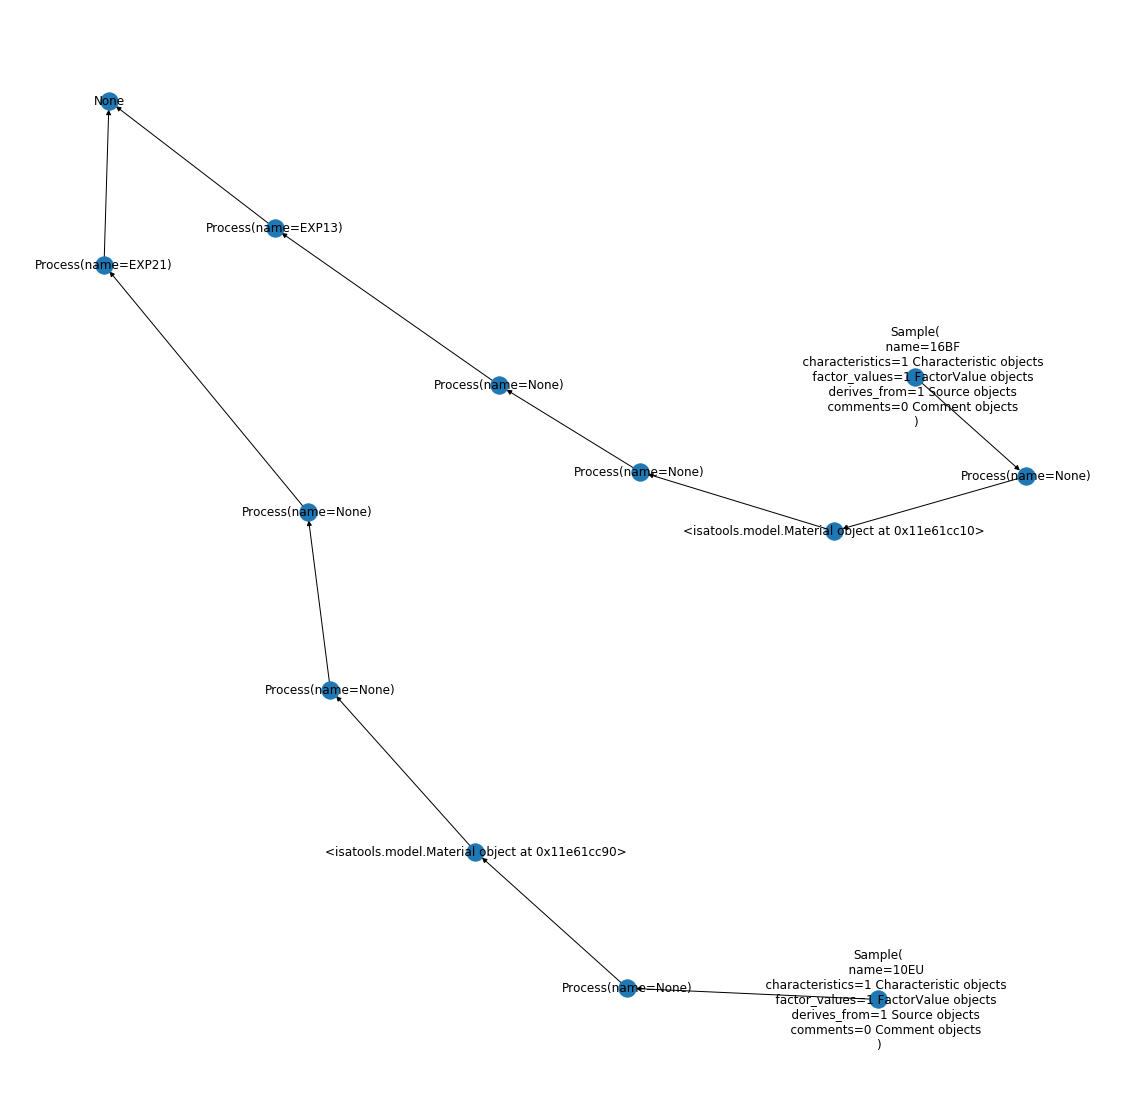

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 20))
nx.draw(investigation_bii7.studies[0].assays[0].graph, with_labels=True, figsize=(12, 12), ax=ax)


In [26]:
[node.id for node in investigation_bii7.studies[0].assays[0].graph.nodes if node is not None]
[(
    process.id, 
    getattr(process.prev_process, 'id', None), 
    getattr(process.next_process, 'id', None)
) for process in investigation_bii7.studies[0].assays[0].process_sequence]

2019-12-05 16:10:28,257 [INFO]: model.py(graph:1543) >> Building graph for object: Assay(
    measurement_type=environmental gene survey
    technology_type=nucleotide sequencing
    technology_platform=454 GS FLX
    filename=a_matteo-assay-Gx.txt
    data_files=2 DataFile objects
    samples=2 Sample objects
    process_sequence=8 Process objects
    other_material=2 Material objects
    characteristic_categories=0 OntologyAnnots
    comments=0 Comment objects
    units=0 Unit objects
)


[('#process/nucleic_acid_extraction21', None, '#process/PCR_amplification21'),
 ('#process/PCR_amplification21',
  '#process/nucleic_acid_extraction21',
  '#process/library_construction21'),
 ('#process/library_construction21',
  '#process/PCR_amplification21',
  '#process/EXP13'),
 ('#process/EXP13', '#process/library_construction21', None),
 ('#process/nucleic_acid_extraction1', None, '#process/PCR_amplification1'),
 ('#process/PCR_amplification1',
  '#process/nucleic_acid_extraction1',
  '#process/library_construction1'),
 ('#process/library_construction1',
  '#process/PCR_amplification1',
  '#process/EXP21'),
 ('#process/EXP21', '#process/library_construction1', None)]

In [27]:
from isatools.isatab import _all_end_to_end_paths
paths = _all_end_to_end_paths(
    investigation_bii7.studies[0].assays[0].graph, 
    start_nodes=investigation_bii7.studies[0].samples
)
len(paths)

2019-12-05 16:10:28,271 [INFO]: model.py(graph:1543) >> Building graph for object: Assay(
    measurement_type=environmental gene survey
    technology_type=nucleotide sequencing
    technology_platform=454 GS FLX
    filename=a_matteo-assay-Gx.txt
    data_files=2 DataFile objects
    samples=2 Sample objects
    process_sequence=8 Process objects
    other_material=2 Material objects
    characteristic_categories=0 OntologyAnnots
    comments=0 Comment objects
    units=0 Unit objects
)
2019-12-05 16:10:28,299 [INFO]: isatab.py(_all_end_to_end_paths:1152) >> Found 2 paths!


2

In [28]:
from isatools.model import _build_assay_graph
import logging
log = logging.getLogger('isatools')
log.setLevel(logging.DEBUG)
g = _build_assay_graph(investigation_bii7.studies[0].assays[0].process_sequence)

2019-12-05 16:10:28,306 [DEBUG]: model.py(_build_assay_graph:54) >> linking process #process/nucleic_acid_extraction21 to output #material/extract-16BF
2019-12-05 16:10:28,309 [DEBUG]: model.py(_build_assay_graph:64) >> linking input #sample/sample-16BF to process #process/nucleic_acid_extraction21
2019-12-05 16:10:28,310 [DEBUG]: model.py(_build_assay_graph:58) >> linking process #process/PCR_amplification21 to prev_process #process/library_construction21
2019-12-05 16:10:28,311 [DEBUG]: model.py(_build_assay_graph:64) >> linking input #material/extract-16BF to process #process/PCR_amplification21
2019-12-05 16:10:28,312 [DEBUG]: model.py(_build_assay_graph:58) >> linking process #process/library_construction21 to prev_process #process/EXP13
2019-12-05 16:10:28,312 [DEBUG]: model.py(_build_assay_graph:68) >> linking prev_process #process/PCR_amplification21 to process #process/library_construction21
2019-12-05 16:10:28,313 [DEBUG]: model.py(_build_assay_graph:58) >> linking process #p

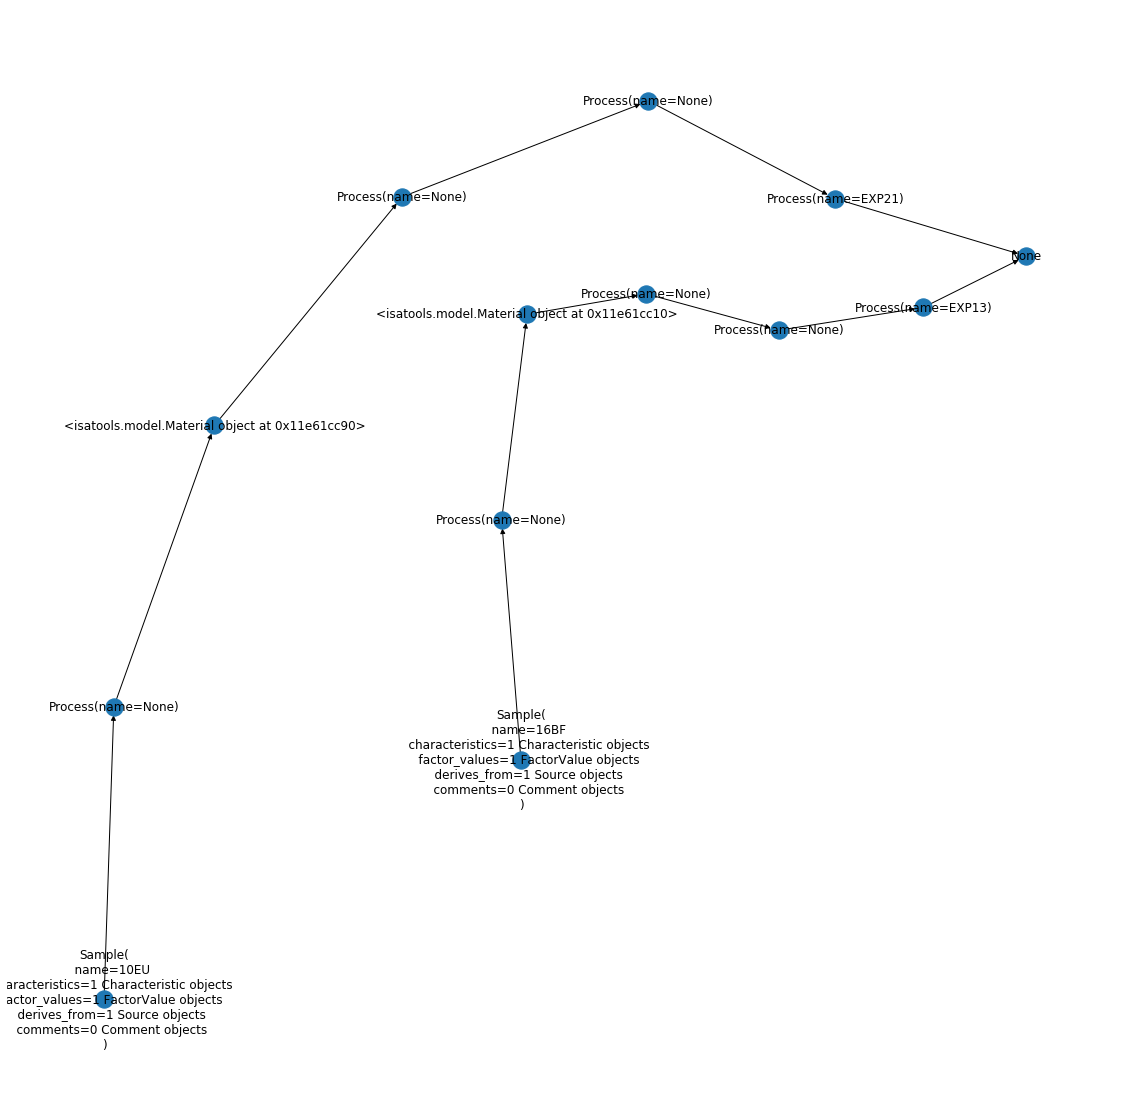

In [31]:
fig, ax = plt.subplots(figsize=(20, 20))
nx.draw(g, with_labels=True, figsize=(12, 12), ax=ax)

In [30]:
[(getattr(node1, 'id', None), getattr(node2, 'id', None)) for node1, node2 in g.edges]

[('#process/nucleic_acid_extraction21', '#material/extract-16BF'),
 ('#material/extract-16BF', '#process/PCR_amplification21'),
 ('#sample/sample-16BF', '#process/nucleic_acid_extraction21'),
 ('#process/PCR_amplification21', '#process/library_construction21'),
 ('#process/library_construction21', '#process/EXP13'),
 ('#process/EXP13', None),
 ('#process/nucleic_acid_extraction1', '#material/extract-10EU'),
 ('#material/extract-10EU', '#process/PCR_amplification1'),
 ('#sample/sample-10EU', '#process/nucleic_acid_extraction1'),
 ('#process/PCR_amplification1', '#process/library_construction1'),
 ('#process/library_construction1', '#process/EXP21'),
 ('#process/EXP21', None)]